## Описание проекта
**Приоритизация гипотез и А/В-тест для увеличения выручки интернет-магазина.**

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите AB-тест и проанализируйте результаты.

## Часть 1. Приоритизация гипотез

### Исходные данные
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Применим фреймворк ICE и фреймворк RICE для приоритизации гипотез. 

     Данные файла hypothesis.csv:

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


In [1]:
import pandas as pd  # Импортируем библиотеки
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sbn
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()


hipothesis = pd.read_csv('/datasets/hypothesis.csv')  # переносим данные из файла в датафрейм
hipothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [2]:
pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150  
hipothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Судя по всему, значения параметров reach, impact, confidence, efforts заданы по десятибалльной шкале.

### Фреймворк ICE для приоритизации гипотез.

In [3]:
hipothesis.columns = map(str.lower, hipothesis.columns) # Заменяем все буквы в названиях столбцов на строчные

hipothesis['ICE'] = (hipothesis['impact'] * hipothesis['confidence'] 
                     / hipothesis['efforts']                                # ICE = (Impact x Confidence)/Efforts
                    )                          
# округляем до 1 знака после запятой - после комментария ревьюера:
pd.set_option('display.float_format', '{:.1f}'.format)  # Все числа в таблице отражаются с 1 знаком после запятой

(hipothesis.
      sort_values(by='ICE', ascending=False).   # Отсортируем по убыванию приоритета
      loc[:, ['hypothesis','ICE']]              # Выведем интересующие нас два столбца
     )

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Фреймворк RICE для приоритизации гипотез

In [4]:
hipothesis['RICE'] = (hipothesis['reach'] * hipothesis['impact'] * hipothesis['confidence'] 
                / hipothesis['efforts']
               )                        # RICE = (Reach x Impact x Confidence)/Efforts
(hipothesis.
      sort_values(by='RICE', ascending=False).   # Отсортируем по убыванию приоритета
      loc[:, ['hypothesis','RICE']]              # Выведем интересующие нас два столбца
     )   


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [5]:

hip = (hipothesis.loc[:, ['hypothesis', 'ICE', 'RICE']].
       set_index('hypothesis').
       sort_values(by='ICE', ascending=False).
       applymap(lambda x: round(x, 0)) # округлили до целых
      )

hip.style.highlight_max(color='yellow') # выделили цветом максимальное значение в столбце

,ICE,RICE
hypothesis,,
"Запустить акцию, дающую скидку на товар в день рождения",16,16
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13,40
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11,112
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1,4
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1,9
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


### Выводы

В тройке лидеров согласно обоим примененным способам приоритизации две гипотезы:
- №7  Добавить форму подписки на все основные страницы
- №0  Добавить два новых канала привлечения трафика

Так как RICE отличается от метода ICE тем,  что в формулу в числителе входит оценка, скольких пользователей затронет изменение, то численно RICE в целом больше ICE. Если сравнить места в иерархии ICE и RICE, то гипотеза № 7 поднялась выше, чем гипотеза № 0.  А лидер для ICE гипотеза № 8 (акция, дающая скидку на товар) c учетом Reach стала проигрывать в несколько раз лидерам в RICE.

## Часть 2. Анализ AB-теста
У нас есть проведенный AB-тест, результаты которого описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Поставленная задача: проанализировать AB-тест.

### Исходные данные
Данные для второй части иссдедований.

      Файл orders.csv:
      
transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа AB-теста, в которую попал заказ.

      Файл visitors.csv:
      
date — дата;

group — группа AB-теста;

visitors — количество пользователей в указанную дату в указанной группе AB-теста.

In [6]:
orders = pd.read_csv('/datasets/orders.csv') # переносим данные из файлов в датафреймы
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
print(orders.head()) # Посмотрим информацию о датафреймах
orders.info()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
print(visitors.head())
visitors.info()

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Необходимо привести столбцы дат к подходящему типу (перевести из object в datetime) в обоих DF и подправить названия столбцов в orders. 

Пропущенных значений нет.

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
 
orders.info() # Проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
print('Количество дубликатов в таблицах:', orders.duplicated().sum(), 'и', visitors.duplicated().sum())

Количество дубликатов в таблицах: 0 и 0


In [11]:
A_B_visitors = orders.groupby('visitor_id')['group'].nunique()
print('Общее количество покупателей:', len(A_B_visitors)) 

print('Количество пользователей, попавших в обе группы А и В:', A_B_visitors[A_B_visitors==2].count())  
                                                                            

Общее количество покупателей: 1031
Количество пользователей, попавших в обе группы А и В: 58




Вывод. Пропущенных значений нет, дубликатов нет. Так как количество покупателей, попавших в обе группы, достаточно велико (более 5% от общего числа), удалять их не корректно, так как это может сказаться на общем результате.


Подготовим данные для построения графиков и дальнейшего анализа. 

In [13]:
datesGroups = orders[['date', 'group']].drop_duplicates()  # создадим массив уникальных пар значений дат и групп теста

ordersAggregated = datesGroups.apply(    # получим агрегированные кумулятивные по дням данные о заказах 
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',   #   .pd.Series.nunique считает число уникальных значений
            'visitor_id': 'nunique',
            'revenue': 'sum'
        }
    ),
    axis=1
).sort_values(by=['date', 'group'])  # и сортируем их по дате, затем по группе

visitorsAggregated = datesGroups.apply(       # получим агрегированные кумулятивные по дням данные о посетителях 
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])  # и сортируем их

cumulativeData = ordersAggregated.merge(       # Объединяем полученные таблицы по дате и группе
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [    # переименуем столбцы новой таблицы
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# Срез по группе А - датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Срез по группе В - датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


### График кумулятивной выручки по группам

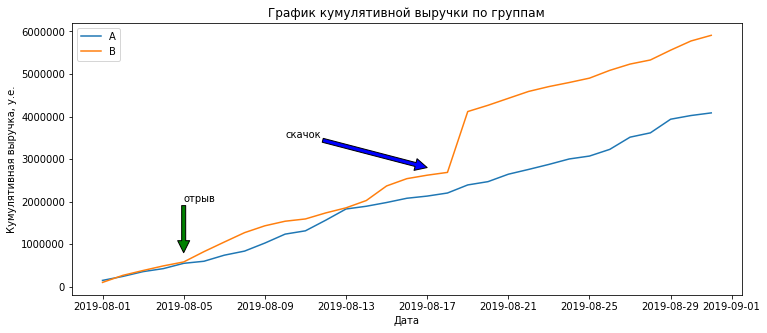

In [14]:
plt.figure(figsize=(12, 5)) # Задали размер графика

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата') # Подписали ось X
plt.ylabel('Кумулятивная выручка, у.е.') # Подписали ось Y


# Код из комментария от ревьюера
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='b'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
# ... Очень симпатично выглядит...

plt.title('График кумулятивной выручки по группам') # Вывели заголовок. Код после замечания ревьюера
plt.show()

Выручка равномерно увеличивается в течение всего теста для группы А и растет для группы В, но график выручки группы В в районе 18-19 августа скачкообразно растет. Это может означать либо всплеск числа заказов, либо появление аномально дорогих заказов в выборке. 


### График кумулятивного среднего чека по группам

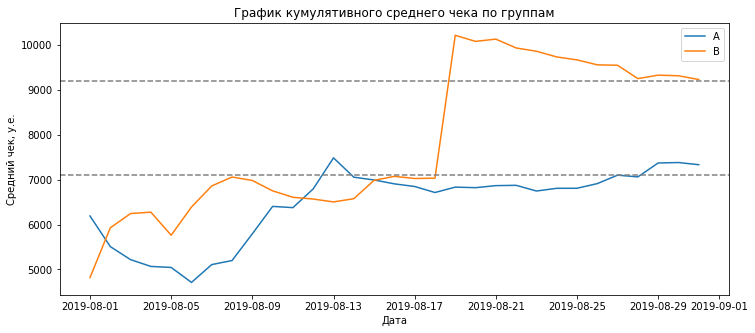

In [15]:
plt.figure(figsize=(12, 5)) # Задали размер графика

# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
    label='A'
)
plt.plot(
    cumulativeRevenueB['date'], 
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
    label='B'
)

plt.axhline(y=9200, color='grey', linestyle='--')
plt.axhline(y=7100, color='grey', linestyle='--')

plt.legend()
plt.xlabel('Дата') # Подписали ось X
plt.ylabel('Средний чек, у.е.') # Подписали ось Y
plt.title('График кумулятивного среднего чека по группам') # Вывели заголовок. Код после замечания ревьюера
plt.show()

Средний чек в обеих группах становится равномерным ближе к концу теста: установился в районе 7000 для группы A и незначительно падает для группы B. Судя по этому и предыдущему графикам, в группу B 18-19 августа попали крупные заказы, вызвавшие резкое увеличение среднего чека и всплеск на графике. Похоже, нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

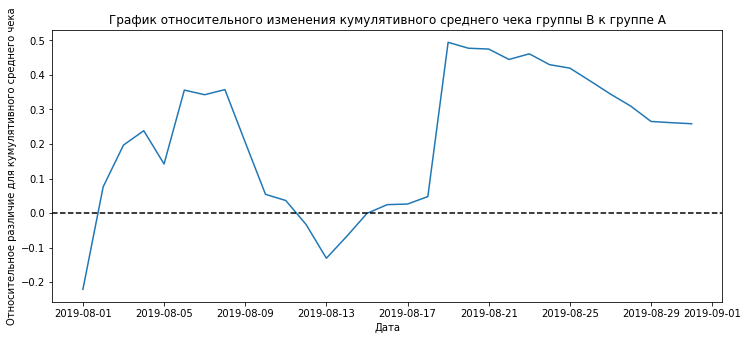

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(12, 5)) # Задали размер графика

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         / (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)

# добавляем горизонтальную пунктирную ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата') # Подписали ось X
plt.ylabel('Относительное различие для кумулятивного среднего чека') # Подписали ось Y
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') # Вывели заголовок. Код после замечания ревьюера
plt.show()

Резко "скачущий" график различия для кумулятивного среднего чека может означать аномально высокие стоимости заказов, то есть "выбросы". 

### График кумулятивной конверсии по группам

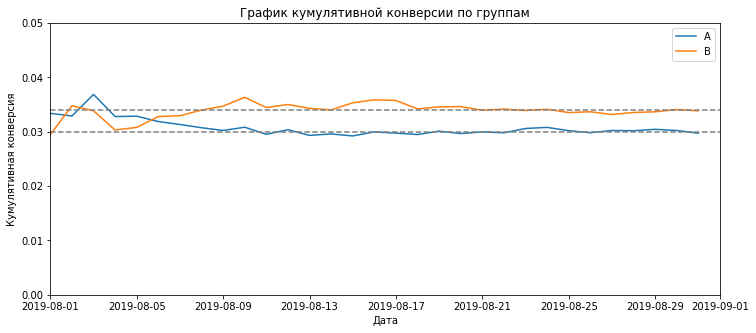

In [17]:
# Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). 
# Передадим ему минимальное и максимальное значения оси x; 
# минимальное и максимальное значения оси y — ["2019-04-01", '2019-04-23', 0, 0.015]:

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.figure(figsize=(12, 5)) # Задали размер графика

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.axhline(y=0.030, color='grey', linestyle='--')
plt.axhline(y=0.034, color='grey', linestyle='--')

plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1),    # задали масштаб осей - ось Х
          0, 0.05])                                            # ось Y
plt.xlabel('Дата')   # Подписали ось X
plt.ylabel('Кумулятивная конверсия')   # Подписали ось Y
plt.title('График кумулятивной конверсии по группам') # Вывели заголовок. Код после замечания ревьюера
plt.show()

К седьмому дню эксперимента группы вышли примерно на одно значение и зафиксировалась, но конверсия группы B стала стабильно выше конверсии группы А.

### График относительного изменения кумулятивной конверсии группы B к группе A

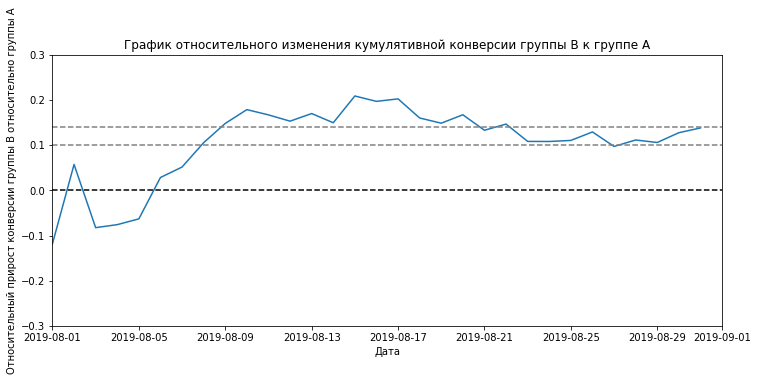

In [18]:
# Построим график относительного различия кумулятивных конверсий:

mergedCumulativeConversions = (      # объединим обе таблицы кумулятивных конверсий групп А и В
    cumulativeDataA[['date','conversion']].
        merge(
            cumulativeDataB[['date','conversion']], 
            left_on='date', 
            right_on='date', 
            how='left', 
            suffixes=['A', 'B']
        )
)

plt.figure(figsize=(12, 5)) # Задали размер графика
plt.plot(mergedCumulativeConversions['date'], 
         (
             mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1
         ),
         label="Относительный прирост")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1),    # задали масштаб осей - ось Х
          -0.3, 0.3])                                            # ось Y
plt.xlabel('Дата')                     # Подписали ось X
plt.ylabel('Относительный прирост конверсии группы B относительно группы A')   # Подписали ось Y
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A') # Вывели заголовок. 
plt.show()

В начале теста группа B с переменным успехом проигрывала группе A, затем ее показатели улучшились. Но примерно в середине теста относительный прирост конверсии начал плавно падать, потом стабилизировался в районе 0,1 и опять постепенно растёт.

В целом отношение конверсии почти установилось, но сейчас делать какие-либо выводы по тесту нельзя. Сначала нужно проанализировать аномалии, возможно, они изменят картину. Сделаем это далее.


### График количества заказов по пользователям

In [19]:
ordersByUsers = (orders.
    groupby('visitor_id', as_index=False).       # сгруппируем заказы по пользователям
    agg({'transaction_id' : pd.Series.nunique})  # посчитаем агрегированные метрики на сгруппированных данных
                  )                 
ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.
      sort_values(by='orders',ascending=False).head()
     )                                           # Посмотрим первые 5 строк с максимальным числом заказов

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


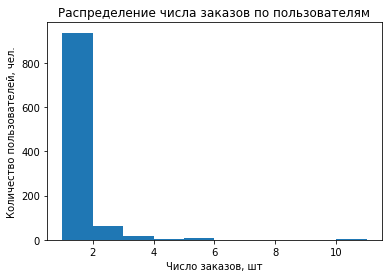

In [20]:
# Построим гистограмму распределения числа заказов по пользователям методом hist().

plt.hist(ordersByUsers['orders'], bins=10) 

plt.title('Распределение числа заказов по пользователям') # Вывели заголовок. Код после замечания ревьюера
plt.xlabel('Число заказов, шт')                           # Подписали ось X
plt.ylabel('Количество пользователей, чел.')              # Подписали ось Y
plt.show()

Видим, что есть, например, всего два пользователя с максимальным числом заказов 11, но более-менее видимые столбцы гистограммы начинаются от значения в три заказа. Но, прежде чем принимать какие-либо решения об аномальном количестве заказов, найдем границу аномальных значений с помощью перцентилей так, чтобы отсеять не более, чем от 1% до 5% наблюдений с крайними значениями. то есть посчитаем 95-й и 99-й перцентили.

### Граница для определения аномальных пользователей
Найдем 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя

print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% пользователей оформляли более 2 заказов, а 90% пользователей заказывали что-либо всего один раз.
Выглядит разумным выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять пользователей, у которых 5 заказов и более.


### Точечный график стоимостей заказов

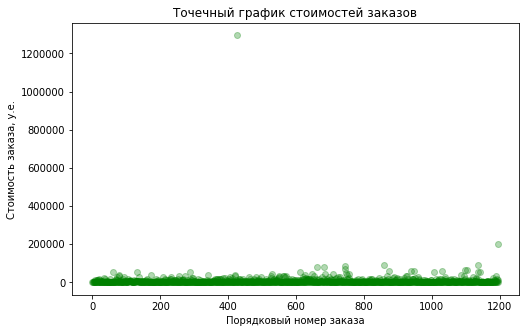

In [22]:
# Оценим стоимость заказов 
plt.figure(figsize=(8, 5)) # Задали размер графика

x_values = pd.Series(range(0, len(orders['revenue']))) # Задали значения оси Х (0, 1, 2, 3, ... до кол-ва заказов)

# строим точечный график: порядковый номер заказа по оси Х и его цена по оси Y
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.3) 

plt.title('Точечный график стоимостей заказов') # Вывели заголовок. Код после замечания ревьюера
plt.xlabel('Порядковый номер заказа')                     # Подписали ось X
plt.ylabel('Стоимость заказа, у.е.')   # Подписали ось Y
plt.show()

Видим, что все цены заказов находятся в диапазоне примерно до 10 000 рублей, кроме двух, чья стоимость составляет около 20 000 и даже около 1 300 000 рублей, то есть в сто больше!
По-видимому, этот самый дорогой заказ попал в группу В теста и искажал результаты (мы видели скачки на графиках). При этом такой заказ - либо просто исключение, которое проявилось не из-за тестирования гипотезы, а случайно, либо и вовсе ошибочные данные.

Следует удалить аномально дорогие заказы из теста. Самые дешёвые заказы из-за маленькой стоимости слабо влияют на средний чек, их удалять не будем. По графику можно выбрать границу аномальных заказов где-то между 18 000 и 25 000 рублей, но мы найдем точные значения с помощью перцентилей так, чтобы отсеять не более, чем от 1% до 5% наблюдений с крайними значениями.

###  Граница для определения аномальных заказов
Найдем 95-й и 99-й перцентили стоимости заказов.

In [23]:
print(np.percentile(orders['revenue'], [50, 90, 95, 99])) # считаем выборочные перцентили стоимости заказов 

print(orders.sort_values(by='revenue',ascending=False).head()) # Посмотрим первые 5 строк с максимальной стоимостью заказов 

[ 2978.  18168.  28000.  58233.2]
      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B


Среди аномальных значений стоимости заказов есть как группа А, так и группа В, то есть они не связаны с проведенным экспериментом, но могут искажать результаты всего теста. Так как медианное значение (50-й перцентиль) составляет чуть меньше 3 тысяч, можно считать аномальными те значения, которые встречаются реже, чем в 5% случаев, и составляют более 28 000 (95-й перцентиль).

### Статистическая значимость различий в конверсии между группами по «сырым» данным
Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.  Чтобы подготовить выборки к проверке критерием Манна-Уитни, для начала создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'userId', 'orders'. В них для пользователей, которые хотя бы 1 раз совершали заказ, укажем число заказов. 

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

Затем объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Количество нулей равно разнице между суммой посетителей в группе и количеством записей о заказах. Создадим объект pd.Series нужной длины отдельно для группы А и группы В сразу в теле функции concat(). 

In [25]:
# каждый элемент выборок sampleA и sampleВ — число заказов определённого пользователя, в том числе ноль
sampleA = pd.concat(      
    [
        ordersByUsersA['orders'],
        pd.Series(                 #  Создаем объект pd.Series 
            0,                     #  из нулей, 
            index = np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() 
                - len(ordersByUsersA['orders'])                                  
            ), 
            name = 'orders'
        )
    ],
    axis=0   # объединяем по строкам, друг за другом
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0, 
            index = np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() 
                - len(ordersByUsersB['orders'])
            ), 
            name='orders')
    ],
    axis=0
) 
print(len(sampleA), len(sampleB)) # Проверили длину   

18736 18916


Найдём конверсию сдедующим образом. 

Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей, то есть, фактически, найдём среднее в выборке sampleA - применим метод mean(). Аналогично для группы B: sampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

   
Сформулируем гипотезы:
Н0: Нет статистической значимости различий между уровнями конверсии в группах А и В.
Н1: Есть статистическая значимость различий между уровнями конверсии в группах А и В.
    
Для возможности отвержения нулевой гипотезы применим критерий Манна-Уитни. Так как есть возможность отклонения наблюдаемого значения от предполагаемого в обе стороны (конверсия А либо больше, либо меньше конверсии В), то альтернативная гипотеза является двусторонней. Учтем это, указав в критерии Манна-Уитни mannwhitneyu() параметр alternative='two-sided'. 


In [26]:
# Применим критерий Манна-Уитни mannwhitneyu() и отформатируем p-value, округлив его до трёх знаков после запятой.

alpha = 0.05  # зададим критический уровень статистической значимости        

results = stats.mannwhitneyu(                                                 
    sampleA, 
    sampleB, 
    alternative='two-sided'    
)[1]                               

print('Значение p-value: {0:.3f}'.format(results))                           

if results < alpha:                                                          
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение p-value: 0.017
Отвергаем нулевую гипотезу


In [27]:
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы B: 0.138


**Вывод**
    
Значение p-value = 0.017 меньше принятого критического уровня статистической значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Относительный прирост конверсии группы B (выигрыш) равен 13,8%.


###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

Нулевая гипотеза: средние чеки по "сырым" данным по группам А и В одинаковы. 
    
Альтернативная гипотеза: средние чеки по "сырым" данным  по группам А и В отличаются. Альтернативная гипотеза является двусторонней. 



In [28]:
results = (
    stats.mannwhitneyu
    (
        orders[orders['group']=='A']['revenue'], 
        orders[orders['group']=='B']['revenue'],
        alternative='two-sided'      
    )
    [1])
     
print('Значение p-value: {0:.3f}'.format(results))                            

if results < alpha:                                                          
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение p-value: 0.729
Не получилось отвергнуть нулевую гипотезу


Ещё найдём относительные различия в среднем чеке между группами:

In [29]:
print('Относительный прирост среднего чека: {0:.3f}'.format
      (
    orders[orders['group']=='B']['revenue'].mean()
    / orders[orders['group']=='A']['revenue'].mean()
    - 1)
     ) 

Относительный прирост среднего чека: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу нет.  Примем, что в среднем чеке нет различий, при этом средний чек группы B значительно выше среднего чека группы A (согласно п."График кумулятивного среднего чека по группам"), а относительный прирост среднего чека группы В выше на 0,25. Это кажется не логичным.

Проверим, связаны ли данные результаты с аномальными значениями - выбросами.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил 5 и более заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и не более 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, содержащей id таких пользователей.

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['user_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# Узнаем, сколько всего аномальных пользователей, с помощью атрибута shape:
print("Аномальных пользователей:", abnormalUsers.shape[0]) 

Аномальных пользователей: 59


Осталось провести анализ на срезе данных, исключив из рассмотрения попавших в abnormalUsers пользователей. Мы можем исключить их, так как их общее число не превышает 5%.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum()               
                - len(ordersByUsersA['orders']) 
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum()              
                - len(ordersByUsersB['orders'])  
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print(len(sampleAFiltered), len(sampleBFiltered)) # Проверили длину


18703 18879



    
Сформулируем:
Нулевая гипотеза: конверсии в группах А и В для фильтрованных данных одинаковы. 
    
Альтернативная гипотеза: есть различия в конверсии между группами А и В для фильтрованных данных.

Для возможности отвержения нулевой гипотезы применим к полученным выборкам критерий Манна-Уитни. Так как альтернативная гипотеза является двусторонней, укажем в критерии Манна-Уитни параметр alternative='two-sided'. 

In [32]:
# Применим критерий Манна-Уитни mannwhitneyu() и отформатируем p-value, округлив его до трёх знаков после запятой.

alpha = 0.05  # зададим критический уровень статистической значимости        

results = stats.mannwhitneyu(                                                
    sampleAFiltered, 
    sampleBFiltered, 
    alternative='two-sided'     # НОВЫЙ ФРАГМЕНТ КОДА
)[1]   

print('Значение p-value: {0:.3f}'.format(results))                           

if results < alpha:                                                          
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print('Относительный прирост конверсии группы B: {0:.3f}'.format(
    sampleBFiltered.mean()
    / sampleAFiltered.mean()
    - 1)
)

Значение p-value: 0.018
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 0.145




**Вывод*
    
Значение p-value = 0.018, хоть и немного увеличилось по сравнению с "сырыми" данными, всё равно меньше принятого критического уровня статистической значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем.    
Относительный прирост конверсии группы B по сравнению с группой А равен 14,5%.

Выводы по конверсии не изменились.



### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: средние чеки для фильтрованных данных по группам А и В одинаковы. 
    
Альтернативная гипотеза: средние чеки для фильтрованных данных по группам А и В отличаются.

Для возможности отвержения нулевой гипотезы применим к полученным выборкам критерий Манна-Уитни. Альтернативная гипотеза является двусторонней. 


In [33]:
results = (
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            alternative='two-sided'  
        )[1]
    )


print('Значение p-value: {0:.3f}'.format(results))
        
if results < alpha:                                                        
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print(
    'Относительный прирост среднего чека: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


Значение p-value: 0.961
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека: -0.014


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу для "фильтрованных" данных нет. При этом, как мы помним, средний чек группы B значительно выше среднего чека группы A согласно графику. Но относительный прирост среднего чека группы В по отношению к А практически нулевой (всего 1,4%, да еще и отрицательный). Теперь понятно, что выбросы очень сильно влияли на выборки в плане относительного прироста среднего чека.

## Решение по результатам АВ-теста 

**Выводы**
 
- Между группами статистически значимых различий в конверсии нет;
- График различия кумулятивной конверсии между группами сообщает, что результаты групп зафиксировались, и результаты группы B выше группы A;
- Относительный прирост конверсии (выигрыш группы B) находится на уровне около 14% вне зависимости от фильтрации аномальных значений;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего чека наводит на мысль о влиянии аномальных значений на результаты;
- После фильтрации аномальных значений данные говорят об отсутствии прироста среднего чека группы В по отношению к группе А.

Итог: 
к моменту завершения теста имеем стабильные результаты, конверсия группы B выше группы A. Исходя из этого, тест следует остановить и признать выигрыш группы В.

## Общий вывод

Отделу маркетинга можно посоветовать в первую очередь проверить две гипотезы:
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Проводимый А/В-тест следует остановить, признав выигрыш группы В - нововведения привели к увеличению конверсии в покупателей. 

Так как при проведении А/В-теста в данных были ошибки, касающиеся попадания одних и тех же пользователей в обе тестируемые группы, желательно продумать, как избежать повторения ситуации в дальнейшем.